In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,KFold
import seaborn as sns

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [3]:
X = diabetes.data
Y = diabetes.target
X_Name = ['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']

C:\Users\Lenovo Demo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


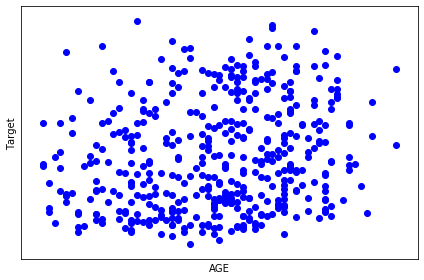

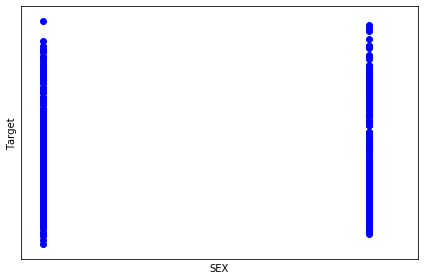

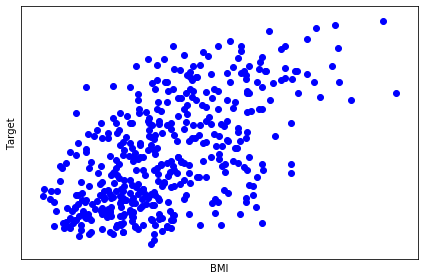

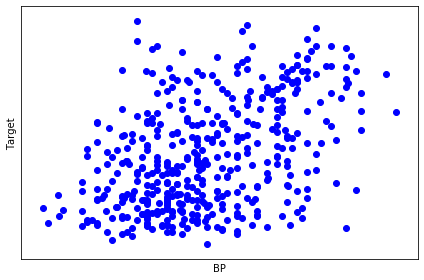

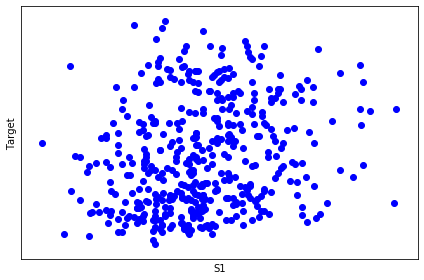

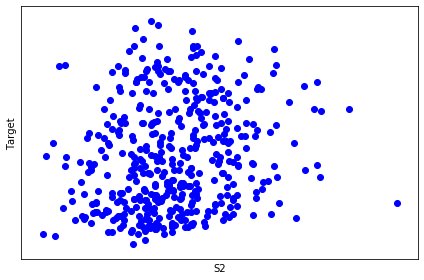

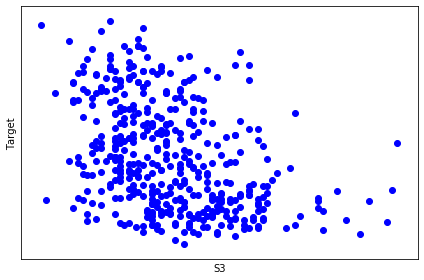

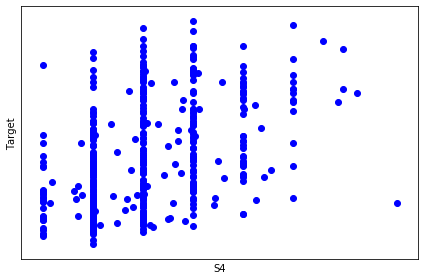

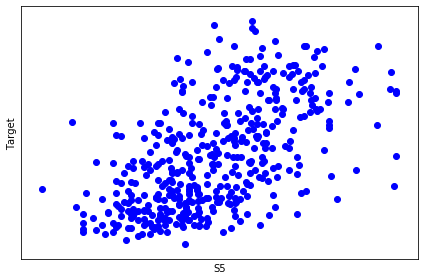

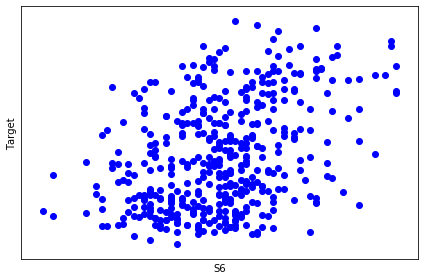

In [4]:
def scatterplot(X,Y,i):
    fig,ax = plt.subplots()

    for t in range(len(X)):
        ax.scatter(X[t, i], Y[t],c='b')
    #     print('plot x[{}] and Y[{}] : ({},{})'.format(t,t,X[t, 0], Y[t]))

    ax.set_xlabel(X_Name[i])
    ax.set_ylabel("Target")
    ax.set_xticks([])
    ax.set_yticks([])
    fig.tight_layout()
    fig.show()
 
for i in range(10):
    scatterplot(X,Y,i)

In [5]:
diabetes_df['Target'] = pd.Series(Y, index=diabetes_df.index)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


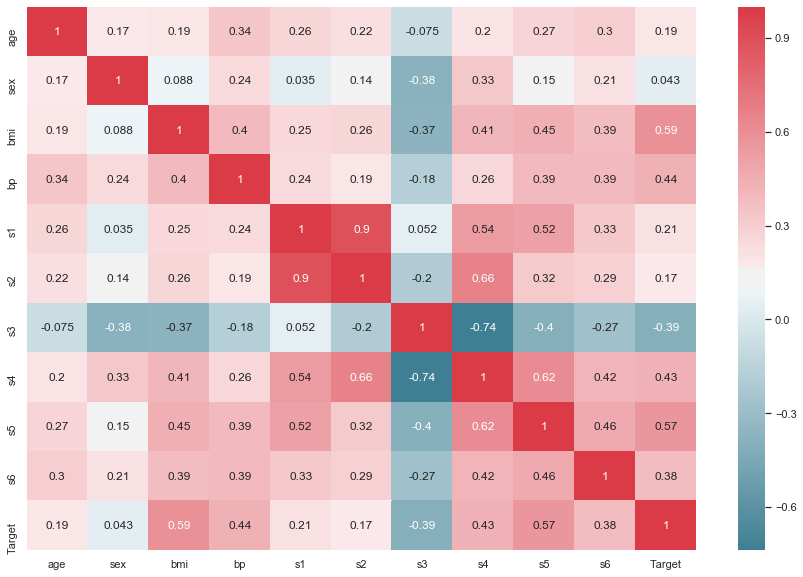

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_,ax=plt.subplots(figsize=(15,10))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(diabetes_df.corr(),annot=True,cmap=colormap)

In [7]:
def single_Reg(x,y):
    mat = []
    for name, met in [
            ('linear regression', LinearRegression()),
            ('lasso(1)', Lasso()),
            ('ridge(1)', Ridge()),
            ('elastic-net(1)', ElasticNet(alpha=1))
    ]:
        X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 31)
        met.fit(X_train, Y_train)

        p = met.predict(X_test)
        RMSE = sqrt(mean_squared_error(Y_test, p))
        MAE = mean_absolute_error(Y_test,p)
        mat.append((name,MAE,RMSE))
        
        print('Method: {}'.format(name))
        print('MAE: {}'.format(MAE))
        print('RMSE: {}'.format(RMSE))
        print()
        print()
    return mat

In [25]:
def CV_5fold(x,y):
    mat = []
    for name, met in [
            ('linear regression', LinearRegression()),
            ('lasso(1)', Lasso()),
            ('ridge(1)', Ridge()),
            ('elastic-net(1)', ElasticNet(alpha=1))
    ]:
        kf = KFold(n_splits=5)
        kf.get_n_splits(x)
        p = np.zeros_like(y)
        for train, test in kf.split(x):
            met.fit(x[train], y[train])
            p[test] = met.predict(x[test])

        MAE = mean_absolute_error(y[test],p[test])
        RMSE = sqrt(mean_squared_error(y[test],p[test]))
        mat.append((name,MAE,RMSE))
        
        print('Method: {}'.format(name))
        print('MAE: {}'.format(MAE))
        print('RMSE: {}'.format(RMSE))
        print()
        print()
    return mat

In [9]:
X2 = X[:,2:4]

In [29]:
matrix_single_x2 = single_Reg(X2,Y)
matrix_single_x2 = pd.DataFrame(matrix_single_x2,columns=['Method','MAE','RMSE'])

Method: linear regression
MAE: 41.887552162446326
RMSE: 52.82647838381153


Method: lasso()
MAE: 52.77705556272535
RMSE: 62.615438247375856


Method: ridge()
MAE: 51.70591652921702
RMSE: 61.778470149124765


Method: elastic-net(1)
MAE: 66.58681837803216
RMSE: 77.03025764528714




In [30]:
matrix_CV_x2 = CV_5fold(X2,Y)
matrix_CV_x2 = pd.DataFrame(matrix_CV_x2,columns=['Method','MAE','RMSE'])

Method: linear regression
MAE: 50.111403666757134
RMSE: 60.0517618174571


Method: lasso(1)
MAE: 58.68749827747563
RMSE: 67.42535836052218


Method: ridge(1)
MAE: 57.444165427751706
RMSE: 65.83381794329021


Method: elastic-net(1)
MAE: 70.43520076285014
RMSE: 80.38708958583285




In [31]:
matrix_CV_x = CV_5fold(X,Y)
matrix_CV_x = pd.DataFrame(matrix_CV_x,columns=['Method','MAE','RMSE'])

Method: linear regression
MAE: 42.38729269073615
RMSE: 53.94633382600275


Method: lasso(1)
MAE: 55.60471592954102
RMSE: 64.1242857090164


Method: ridge(1)
MAE: 50.89496966024981
RMSE: 60.09076033852667


Method: elastic-net(1)
MAE: 70.28256830464392
RMSE: 80.19320477791739




In [33]:
print('single Reg')
print(matrix_single_x2)
print()
print('CV 5Fold on BMI and BP')
print(matrix_CV_x2)
print()
print('CV 5Fold on all features')
print(matrix_CV_x)

single Reg
              Method        MAE       RMSE
0  linear regression  41.887552  52.826478
1            lasso()  52.777056  62.615438
2            ridge()  51.705917  61.778470
3     elastic-net(1)  66.586818  77.030258

CV 5Fold on BMI and BP
              Method        MAE       RMSE
0  linear regression  50.111404  60.051762
1           lasso(1)  58.687498  67.425358
2           ridge(1)  57.444165  65.833818
3     elastic-net(1)  70.435201  80.387090

CV 5Fold on all features
              Method        MAE       RMSE
0  linear regression  42.387293  53.946334
1           lasso(1)  55.604716  64.124286
2           ridge(1)  50.894970  60.090760
3     elastic-net(1)  70.282568  80.193205
